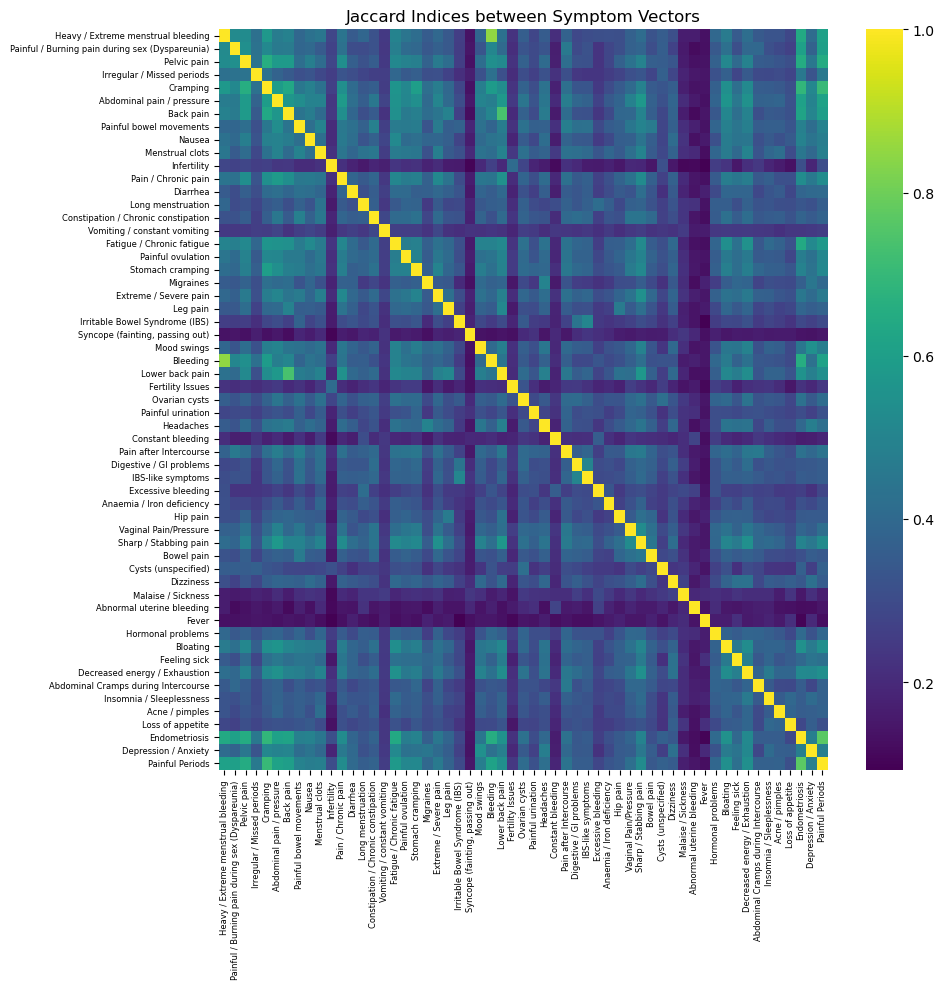

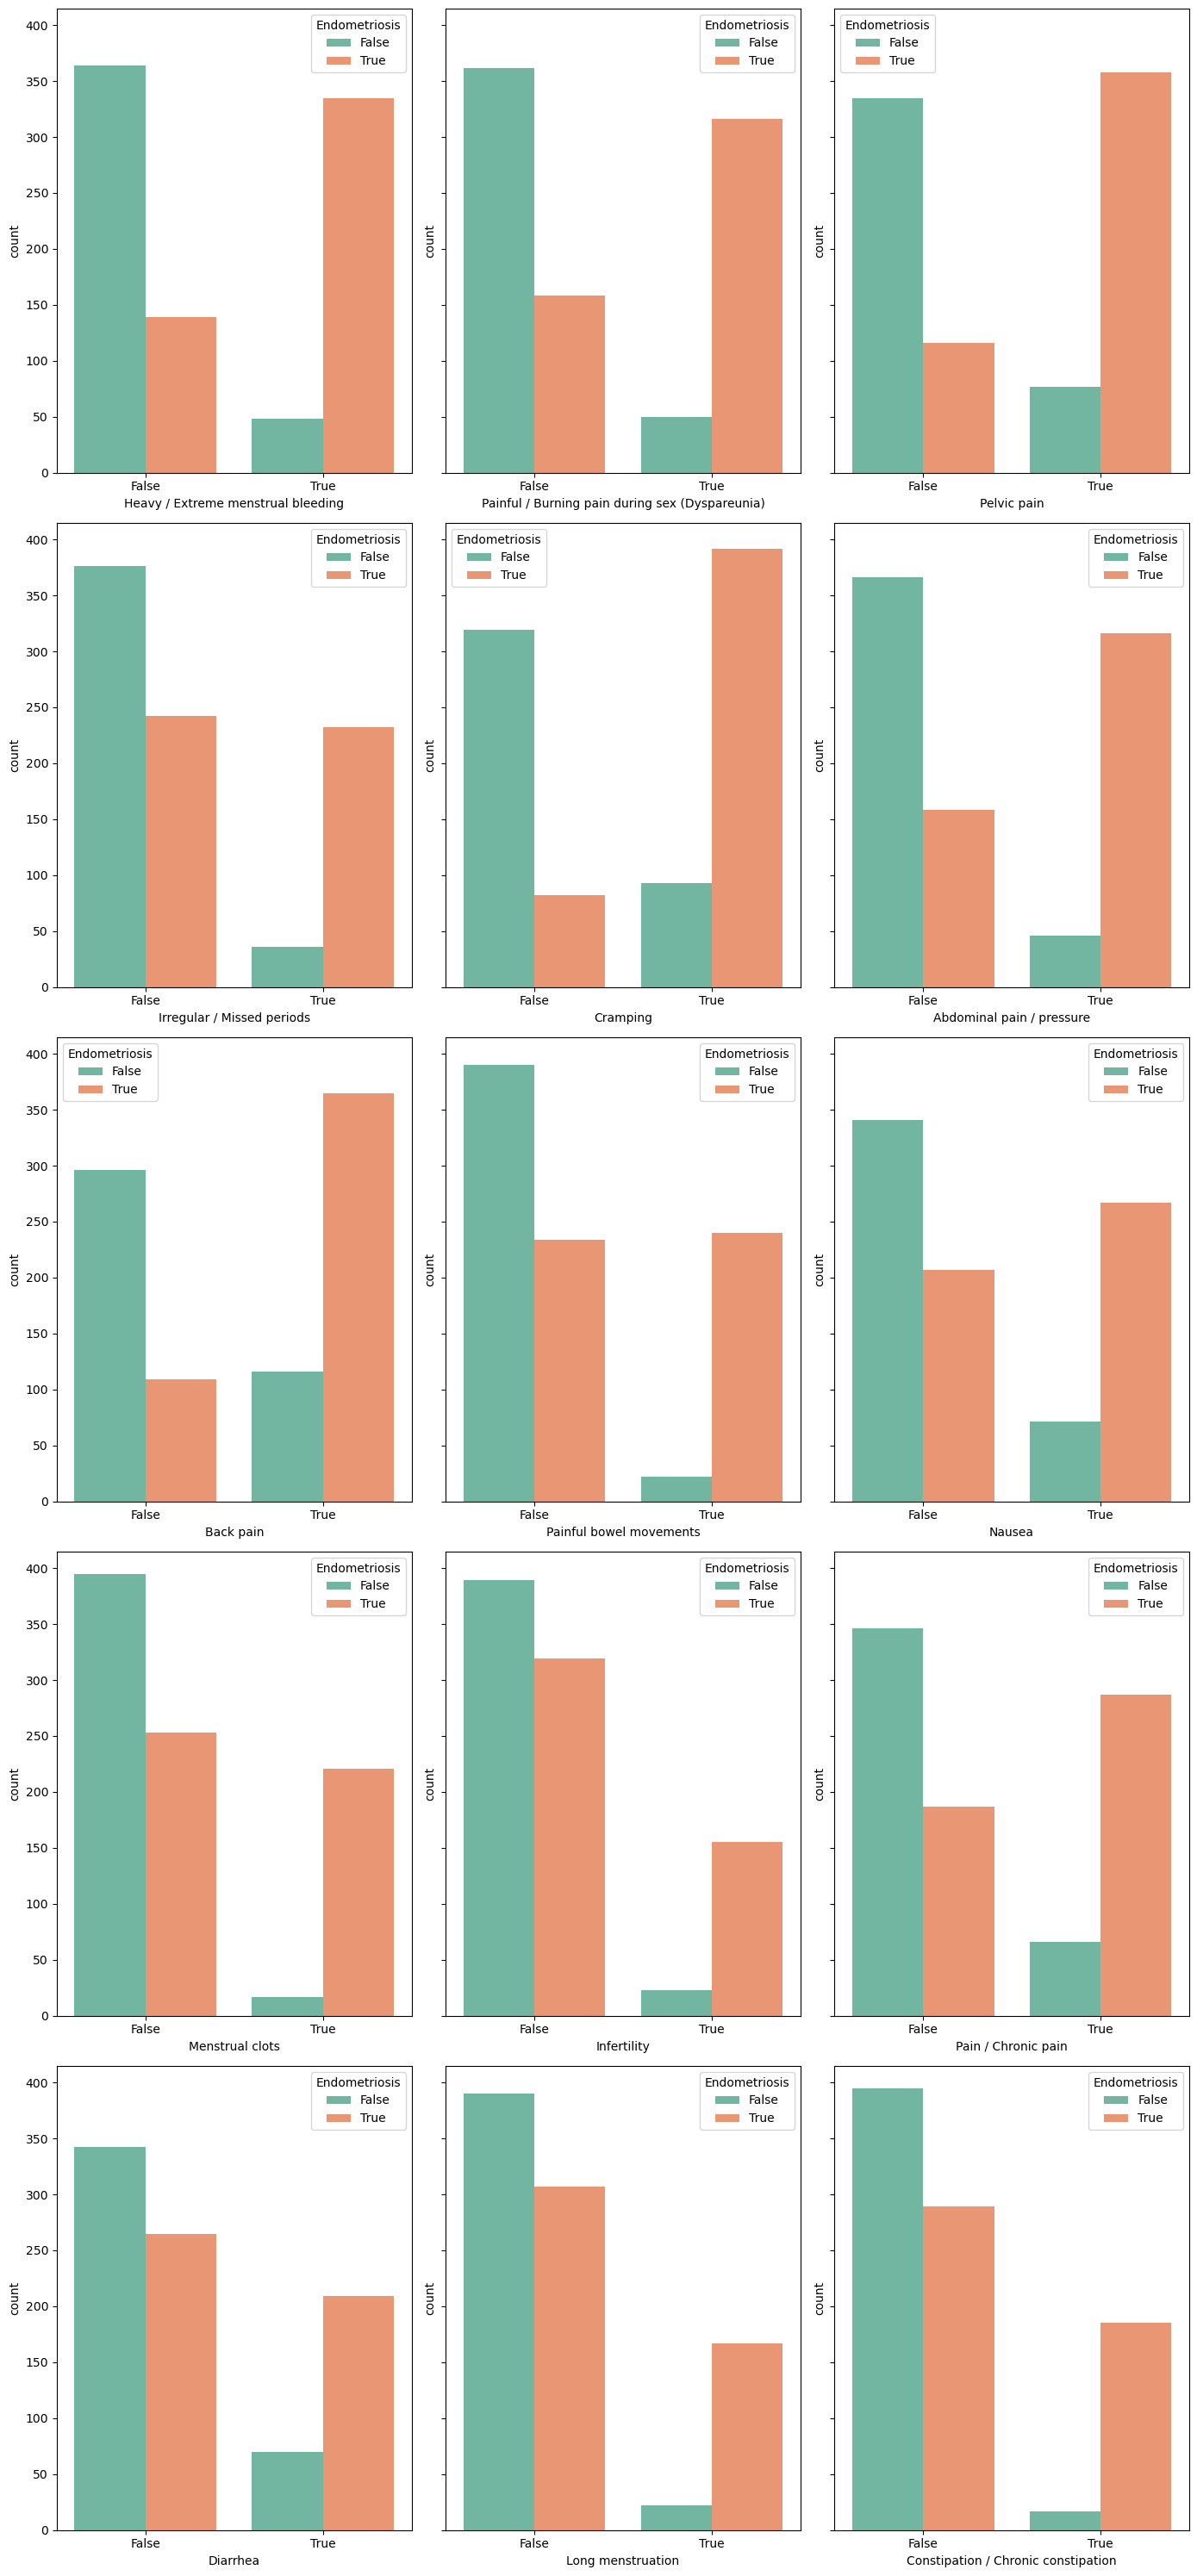

In [4]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from itertools import combinations
from scipy.spatial.distance import jaccard

# Load data from Excel file
data = pd.read_excel('dataset.xlsx')

# Rename label column to Endometriosis
data['Endometriosis'] = data['label']

# Drop the first column
data = data.drop(data.columns[0], axis=1)

# Combine Depression and Anxiety columns into one
data['Depression / Anxiety'] = data[['Depression', 'Anxiety']].max(axis=1)
data = data.drop(['Depression', 'Anxiety'], axis=1)

# Drop unnecessary columns
data = data.drop(['row', 'label'], axis=1)

# Combine Menstrual pain and Painful cramps columns into one
data['Painful Periods'] = data[['Menstrual pain (Dysmenorrhea)', 'Painful cramps during period']].max(axis=1)
data = data.drop(['Menstrual pain (Dysmenorrhea)', 'Painful cramps during period'], axis=1)

# Convert numeric columns to boolean
data_bool = data.apply(lambda x: x > 0)

# Calculate Jaccard similarity matrix
jaccard_matrix = pd.DataFrame(index=data_bool.columns, columns=data_bool.columns, dtype=float)
for pair in combinations(data_bool.columns, 2):
    jaccard_index = 1 - jaccard(data_bool[pair[0]], data_bool[pair[1]])
    jaccard_matrix.at[pair[0], pair[1]] = jaccard_index
    jaccard_matrix.at[pair[1], pair[0]] = jaccard_index

for col in data_bool.columns:
    jaccard_matrix.at[col, col] = 1

# Plot Jaccard heatmap
plt.figure(figsize=(10, 10))
plt.title('Jaccard Indices between Symptom Vectors')
sns.heatmap(jaccard_matrix, annot=False, cmap=sns.color_palette("viridis", as_cmap=True), xticklabels=True, yticklabels=True)
plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)
plt.tight_layout()
path = os.path.join('figures', 'jaccard_heatmap.svg')
plt.savefig(path)

# Plot countplots for symptom analysis
_, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 30), sharey=True)
axes = [axis for subl in axes for axis in subl]
for col, ax in zip(data_bool.columns, axes):
    if col != 'Endometriosis':
        sns.countplot(x=col, hue="Endometriosis", data=data_bool, ax=ax, palette="Set2")
    else:
        sns.countplot(x=col, data=data_bool, ax=ax, palette="Set2")
plt.tight_layout()
path = os.path.join('figures', 'symptoms.png')
plt.savefig(path)

plt.show()
